# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1:</center>
### <center>  Propiedades en Venta</center>
### <center>  Grupo 18</center>


#### **Integrantes:**

* Analía Acevedo
* Santiago Daniel Marczewski Neudeck
* Lucia Belén Napoli
* Brayan Ricaldi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn.preprocessing as skp
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
from preprocessing import preprocesamiento

pd.options.display.max_columns = None

In [2]:
_x_train = pd.read_csv('./DataSet/x_train')
_x_train.drop(columns=['Unnamed: 0'],inplace=True)
_y_train = pd.read_csv('./DataSet/y_train')
_y_train.drop(columns=['Unnamed: 0'],inplace=True)
_x_test = pd.read_csv('./DataSet/x_test')
_x_test.drop(columns=['Unnamed: 0'],inplace=True)
_y_test = pd.read_csv('./DataSet/y_test')
_y_test.drop(columns=['Unnamed: 0'],inplace=True)

# Reducción de la dimensionalidad

**d) Reducción de la dimensionalidad:** en este punto se pide crear un nuevo dataset que
resulte de aplicar una reducción de dimensionalidad sobre el dataset que se obtuvo al
finalizar el preprocesamiento.

## ZSCORE - PCA

In [3]:
x_train = _x_train.copy()
y_train = _y_train.copy()
x_test = _x_test.copy()
y_test = _y_test.copy()

Primero normalizamos los datos

In [4]:
f = ['latitud', 'longitud', 'ambientes', 'dormitorios', 'superficie_cubierta', 'comuna']

In [5]:
scaler = StandardScaler()
scaler.fit(x_train[f])#Porque PCA no se lleva bien con las variables dummies
x_train_scaler = scaler.transform(x_train[f]) #Porque PCA no se lleva bien con las variables dummies

Ahora buscamos el hiperparametro de PCA

El numero minimo de componentes para explicar el 95% de la varianza es: 4


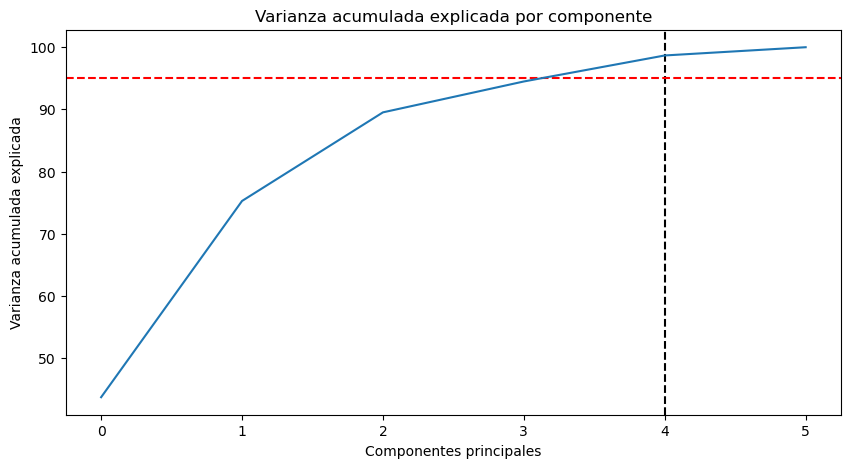

In [6]:
pca = PCA()
pca.fit(x_train_scaler)
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu > 95)
print(
    "El numero minimo de componentes para explicar el 95% de la varianza es: " + str(k)
)
# print("\n")

plt.figure(figsize=[10, 5])
plt.title('Varianza acumulada explicada por componente')
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Componentes principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

Aplico PCA con el k obtenido

In [7]:
ipca = PCA(n_components=k)
ipca_transform=ipca.fit_transform(x_train_scaler)

In [8]:
df = pd.DataFrame(data=ipca_transform, columns = ["PCA1", "PCA2", "PCA3", "PCA4"])

In [9]:
x_train = pd.concat([df, x_train[["Departamento", "PH"]]], axis=1)

In [10]:
x_train

,PCA1,PCA2,PCA3,PCA4,Departamento,PH
0,-1.013799,-2.310668,-0.161948,0.180866,1.0,0.0
1,-1.108385,-1.728945,-0.030619,0.005277,1.0,0.0
2,-0.123248,1.124049,-0.533799,-0.405115,1.0,0.0
3,-0.057025,0.568322,-0.645011,-0.304296,1.0,0.0
4,0.397719,0.867322,-0.953229,0.355667,1.0,0.0
...,...,...,...,...,...,...
58156,0.148876,-2.487246,-0.272148,-0.334680,1.0,0.0
58157,-1.217875,0.476842,-0.507543,0.122228,1.0,0.0
58158,-1.158385,-1.473037,-0.835364,-0.176502,1.0,0.0
58159,-1.296330,1.734346,0.153912,-0.028343,1.0,0.0


Replico lo mismo en el test

In [11]:
def zscore_pca(df, scaler, ipca):
    f = ['latitud', 'longitud', 'ambientes', 'dormitorios', 'superficie_cubierta', 'comuna']
    df_scaler = scaler.transform(df[f])
    ipca_transform=ipca.transform(df_scaler)
    _df = pd.DataFrame(data=ipca_transform, columns = ["PCA1", "PCA2", "PCA3", "PCA4"])
    return pd.concat([_df, df[["Departamento", "PH"]]], axis=1)

In [12]:
x_test = zscore_pca(x_test, scaler, ipca)
x_test

,PCA1,PCA2,PCA3,PCA4,Departamento,PH
0,4.879731,-1.823742,1.097820,-1.650970,0.0,0.0
1,1.374922,-2.498697,0.340685,-0.497767,0.0,1.0
2,1.821322,-1.392457,-0.925101,0.377884,1.0,0.0
3,1.197545,-0.794620,0.237632,-0.772707,1.0,0.0
4,0.156142,-0.966397,0.121841,-0.184738,1.0,0.0
...,...,...,...,...,...,...
14536,-1.052349,-1.692866,-0.587629,0.042478,1.0,0.0
14537,0.166904,0.529568,-0.697265,0.032363,0.0,1.0
14538,-1.716246,0.668013,-0.633542,0.244802,1.0,0.0
14539,-1.709192,1.341258,-0.178855,0.315477,1.0,0.0


In [13]:
x_train.to_csv('./DataSet-Modificados/ZSCORE-PCA/x_train')

In [14]:
y_train.to_csv('./DataSet-Modificados/ZSCORE-PCA/y_train')

In [15]:
x_test.to_csv('./DataSet-Modificados/ZSCORE-PCA/x_test')

In [16]:
y_test.to_csv('./DataSet-Modificados/ZSCORE-PCA/y_test')

**Nota:** Los ítems a, b, c y d son los mínimos requeridos para esta etapa, cada grupo puede crear
nuevas variables que resulten derivadas de los atributos existentes o que resulten de incorporar
nuevas fuentes de datos.

### **2. Agrupamiento**
En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para
esta tarea utilizar el algoritmo K-Means y se deberán realizar los siguientes puntos:
* Analizar la tendencia al *clustering* del dataset.
* Estimar la cantidad apropiada de grupos que se deben formar.
* Evaluar la calidad de los grupos formados realizando un análisis de *Silhouette*.
* Realizar un análisis de cada grupo intentando entender en función de qué
características fueron formados.
* Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que
pertenecen.
* Repetir el análisis anterior, utilizando sólo 3 grupos.

In [ ]:
import geopandas as geopd
from sklearn import preprocessing

In [ ]:
df_completo = pd.read_csv('./DataSet/df_completo')

In [ ]:
df_completo.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
f = ['ambientes', 'dormitorios','superficie_total', 'superficie_cubierta','precio', 'comuna', 'Departamento', 'PH']

In [ ]:
x = df_completo[f].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_clusters=pd.DataFrame(x_scaled, columns=df_completo[f].columns)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans

#### Tendencia al clustering:

In [ ]:
from pyclustertend import hopkins
hopkins(df_clusters, df_clusters.shape[0])

0.0025927474865907116

Vemos un score que tiende a 0, lo que nos indica una alta tendencia a clustering.

#### Estimacion de la cantidad de clusters apropiada:

Primero probemos con el __método de Elbow__ para ver si se aprecia un quiebre marcado

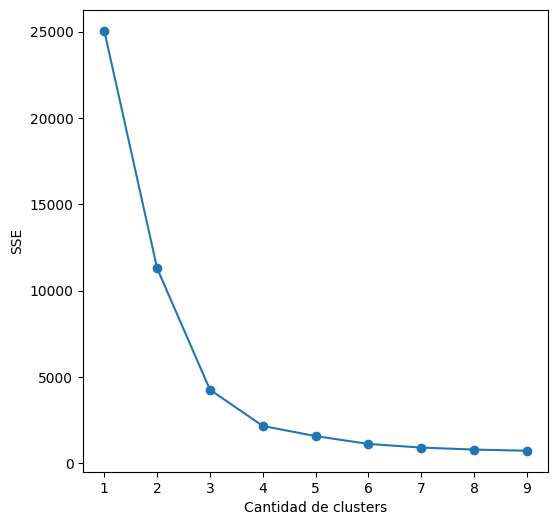

In [ ]:
# Corremos el algoritmo con K entre 2 y 10 y vamos guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_clusters)
    sse.append(km.inertia_)

# Graficamos el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

* Parece ser que el quiebre es alrededor de 4.
* Hagamos una segunda verificacion usando el __Índice de Silueta__ para los numeros cercanos al punto de quiebre.

In [ ]:
from sklearn.metrics import silhouette_score

list_k = list(range(2, 6))

for k in list_k:
    km = KMeans(n_clusters=k)
    pred = km.fit_predict(df_clusters)

    score = silhouette_score(df_clusters, pred)
    print(f"Para {k} clusters el silhouette score es de: {score}")

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_clusters)
plt.show()

In [ ]:
km = KMeans(n_clusters=4)
km.fit(df_clusters)
y_k = km.predict(df_clusters)

In [ ]:
df_completo['cluster']=y_k

#### Visualizemos los clusters en un mapa:

In [ ]:
# Armamos un geodatafreame pasando longitud y latitud a variable de tipo punto
gdf = geopd.GeoDataFrame(
    df_completo, geometry=geopd.points_from_xy(df_completo.longitud, df_completo.latitud))
gdf

,latitud,longitud,ambientes,dormitorios,superficie_total,superficie_cubierta,precio,Departamento,PH,comuna,cluster,geometry
0,-34.637319,-58.361124,3.0,2.0,58.0,55.0,82900.0,1.0,0.0,4,1,POINT (-58.36112 -34.63732)
1,-34.628647,-58.361871,4.0,3.0,70.0,70.0,99000.0,1.0,0.0,4,1,POINT (-58.36187 -34.62865)
2,-34.623886,-58.412746,2.0,1.0,61.0,46.0,100000.0,0.0,1.0,5,2,POINT (-58.41275 -34.62389)
3,-34.625588,-58.423056,4.0,2.0,104.0,54.0,185000.0,0.0,1.0,5,2,POINT (-58.42306 -34.62559)
4,-34.629398,-58.425852,2.0,1.0,62.0,44.0,100000.0,1.0,0.0,5,1,POINT (-58.42585 -34.62940)
...,...,...,...,...,...,...,...,...,...,...,...,...
72697,-34.603245,-58.489810,4.0,3.0,130.0,100.0,220000.0,1.0,0.0,11,0,POINT (-58.48981 -34.60325)
72698,-34.614063,-58.482814,3.0,2.0,68.0,60.0,161000.0,1.0,0.0,11,0,POINT (-58.48281 -34.61406)
72699,-34.614175,-58.479062,1.0,1.0,51.0,30.0,75500.0,1.0,0.0,11,0,POINT (-58.47906 -34.61418)
72700,-34.614175,-58.479062,1.0,1.0,37.0,31.0,74500.0,1.0,0.0,11,0,POINT (-58.47906 -34.61418)


In [ ]:
# Vamos a utilizar un csv con los datos que necesitamos, se obtuvo de la pagina del gobierno de la ciudad
#url='https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/comunas/comunas.csv'
#dp_comunas = geopd.read_file(url)
dp_comunas = geopd.read_file("./comunas.csv")
df_comunas = dp_comunas.copy()

In [ ]:
# Tomamos solamente las columnas que necesitamos
df_comunas=df_comunas.filter(['COMUNAS','geometry'])
df_comunas.rename(columns={'COMUNAS':'comuna'},inplace=True)
# Casteamos las comunas a enteros para mayor comodidad
df_comunas['comuna']=df_comunas.comuna.astype(float)
df_comunas['comuna']=df_comunas.comuna.astype(int)
df_comunas.set_crs('EPSG:4326', inplace=True)

,comuna,geometry
0,2,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1,6,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."
2,10,"MULTIPOLYGON (((-58.48834 -34.62016, -58.48820..."
3,11,"MULTIPOLYGON (((-58.49838 -34.59637, -58.49718..."
4,12,"MULTIPOLYGON (((-58.50331 -34.59386, -58.50347..."
5,14,"MULTIPOLYGON (((-58.42676 -34.55202, -58.42676..."
6,15,"MULTIPOLYGON (((-58.42602 -34.59661, -58.42484..."
7,13,"MULTIPOLYGON (((-58.44033 -34.54022, -58.44032..."
8,4,"MULTIPOLYGON (((-58.38864 -34.63373, -58.38864..."
9,5,"MULTIPOLYGON (((-58.43333 -34.60267, -58.43314..."


[Text(0.5, 183.96379207461464, 'Longitud'),
 Text(112.34722222222221, 0.5, 'Latitud')]

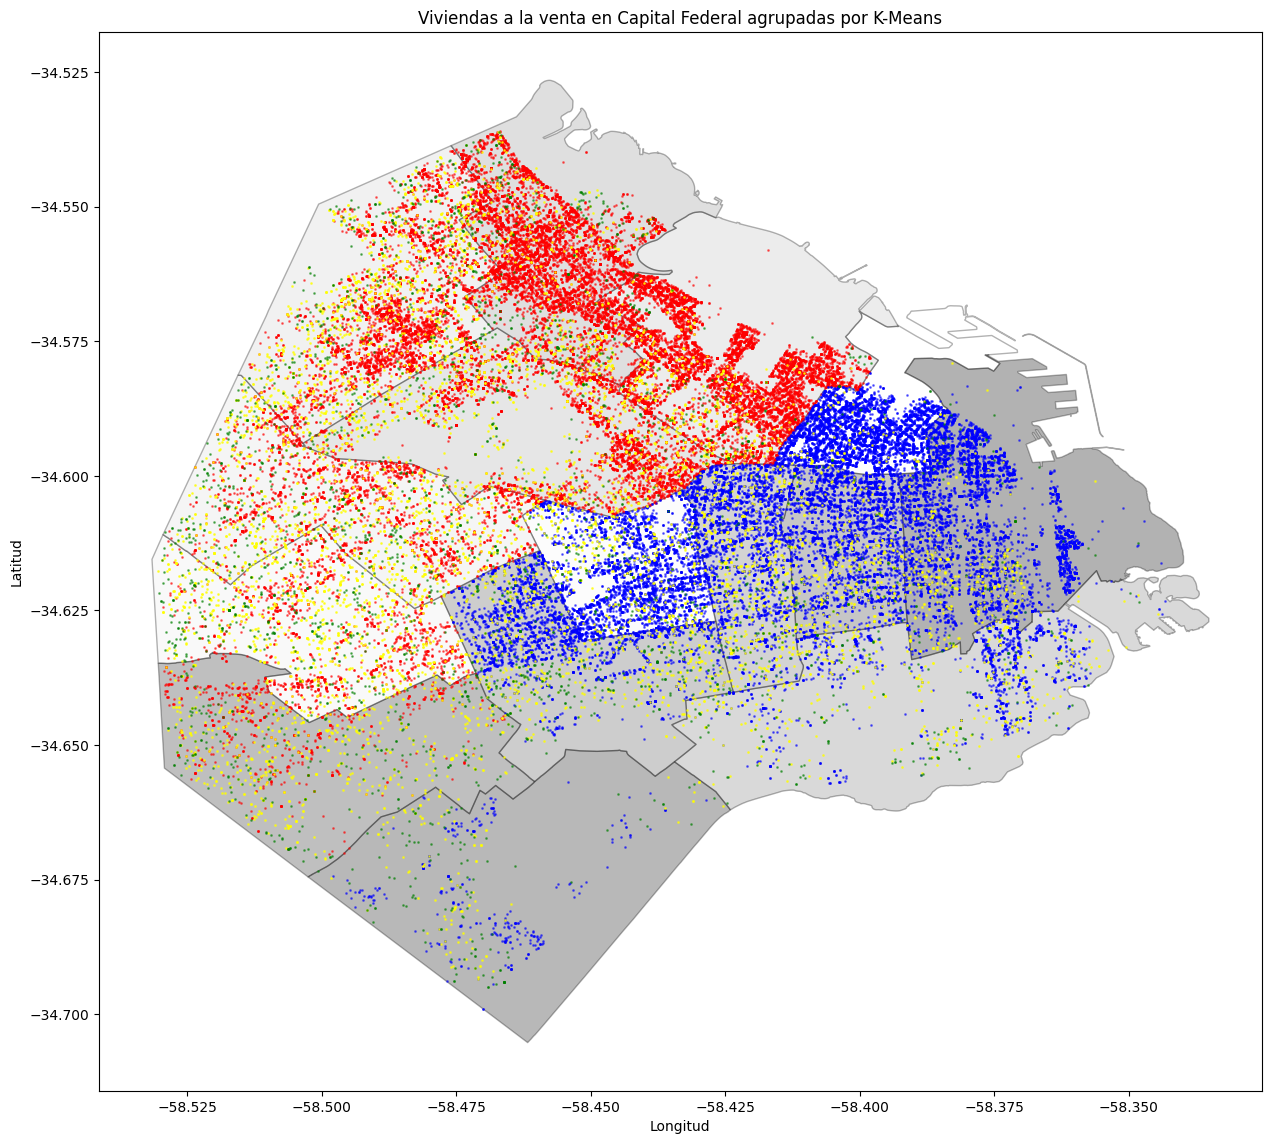

In [ ]:
# Graficamos las viviendas en un mapa para visualizar su distribucion espacial
fig, ax = plt.subplots(figsize=(15,15))
df_comunas.plot(ax=ax,alpha=0.3, facecolor='Grey',edgecolor='k', linewidth=1, cmap='Greys').set(title='Viviendas a la venta en Capital Federal agrupadas por K-Means')
gdf.loc[gdf.cluster == 0, 'geometry'].plot(color='red',ax=ax, alpha=0.5, markersize=1)
gdf.loc[gdf.cluster == 1, 'geometry'].plot(color='blue',ax=ax, alpha=0.5, markersize=1)
gdf.loc[gdf.cluster == 2, 'geometry'].plot(color='yellow',ax=ax, alpha=0.65, markersize=1)
gdf.loc[gdf.cluster == 3, 'geometry'].plot(color='green',ax=ax, alpha=0.5, markersize=1).set(xlabel='Longitud', ylabel="Latitud")

#### Repetimos el analisis para 3 grupos:

In [ ]:
km = KMeans(n_clusters=3)
km.fit(df_clusters)
y_k = km.predict(df_clusters)

In [ ]:
gdf['cluster_2']=y_k

[Text(0.5, 183.96379207461464, 'Longitud'),
 Text(112.34722222222221, 0.5, 'Latitud')]

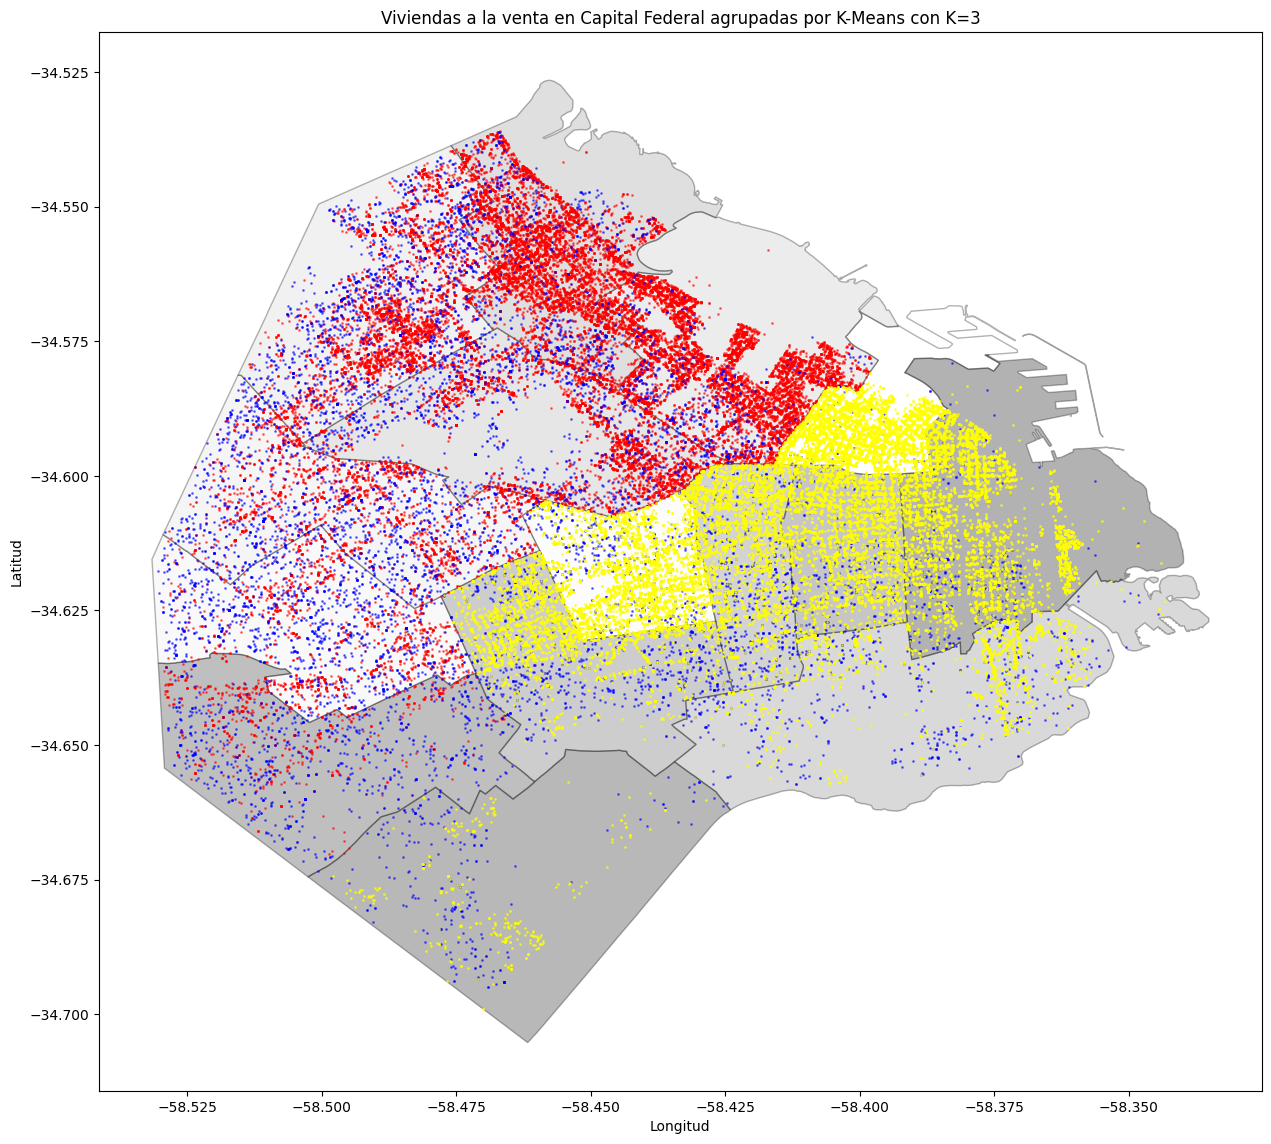

In [ ]:
# Graficamos las viviendas en un mapa para visualizar su distribucion espacial
fig, ax = plt.subplots(figsize=(15,15))
df_comunas.plot(ax=ax,alpha=0.3, facecolor='Grey',edgecolor='k', linewidth=1, cmap='Greys').set(title='Viviendas a la venta en Capital Federal agrupadas por K-Means con K=3')
gdf.loc[gdf.cluster_2 == 0, 'geometry'].plot(color='red',ax=ax, alpha=0.5, markersize=1)
gdf.loc[gdf.cluster_2 == 1, 'geometry'].plot(color='blue',ax=ax, alpha=0.5, markersize=1)
gdf.loc[gdf.cluster_2 == 2, 'geometry'].plot(color='yellow',ax=ax, alpha=0.65, markersize=1).set(xlabel='Longitud', ylabel="Latitud")